In [2]:
#importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score




In [4]:
dataframe = pd.read_csv("creditcard.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65453 entries, 0 to 65452
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    65453 non-null  int64  
 1   V1      65453 non-null  float64
 2   V2      65453 non-null  float64
 3   V3      65453 non-null  float64
 4   V4      65453 non-null  float64
 5   V5      65453 non-null  float64
 6   V6      65453 non-null  float64
 7   V7      65453 non-null  float64
 8   V8      65453 non-null  float64
 9   V9      65453 non-null  float64
 10  V10     65453 non-null  float64
 11  V11     65452 non-null  float64
 12  V12     65452 non-null  float64
 13  V13     65452 non-null  float64
 14  V14     65452 non-null  float64
 15  V15     65452 non-null  float64
 16  V16     65452 non-null  float64
 17  V17     65452 non-null  float64
 18  V18     65452 non-null  float64
 19  V19     65452 non-null  float64
 20  V20     65452 non-null  float64
 21  V21     65452 non-null  float64
 22

In [6]:
dataframe.isnull().values.any()


np.True_

In [7]:
dataframe["Amount"].describe()

,Amount
count,65452.000000
mean,96.276149
std,270.242777
min,0.000000
25%,7.680000
50%,26.220000
75%,88.122500
max,19656.530000


In [8]:
non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud))*100
print("Number of genuine transactions:", non_fraud)
print("Number of Fraud Transactions:", fraud)
print("Percentage of Fraud Transactions: {:.4f}".format(fraud_percent))

Number of genuine transactions: 65283
Number of Fraud Transactions: 169
Percentage of Fraud Transactions: 0.2582


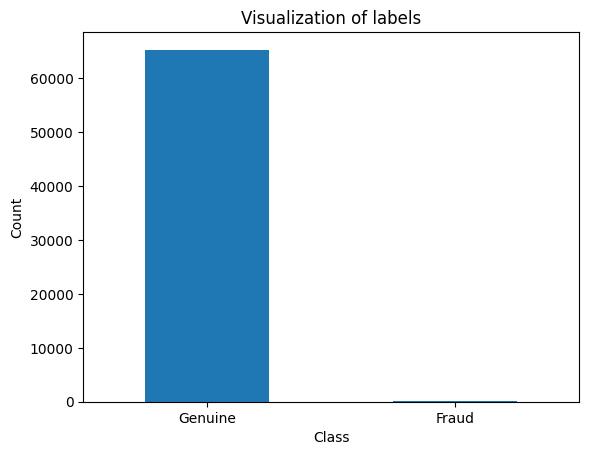

In [39]:
labels = ["Genuine","Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort = True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [10]:

# perform Scaling
scaler = StandardScaler()
dataframe["NormalizedAmount"] =  scaler.fit_transform(dataframe["Amount"].values.reshape(-1,1))
dataframe.drop(["Amount","Time"], inplace = True, axis =1)
Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis = 1)

In [11]:

Y.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [12]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (45817, 29)
Shape of test_X:  (19636, 29)


In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# ✅ Combine X and Y temporarily to drop rows with missing labels
train_data = pd.concat([train_X, train_Y], axis=1)

# Drop rows where target (Y) is NaN
train_data = train_data.dropna(subset=[train_Y.name])

# Split cleaned data back into X and Y
train_X_clean = train_data.drop(columns=[train_Y.name])
train_Y_clean = train_data[train_Y.name]

# ✅ Train the Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(train_X_clean, train_Y_clean)

# ✅ Predict & Score
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

print(f"Decision Tree Accuracy: {decision_tree_score:.2f}%")


Decision Tree Accuracy: 99.87%


In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# ✅ Combine training data
train_data = pd.concat([train_X, train_Y], axis=1)

# ✅ Drop rows where Y is missing
train_data = train_data.dropna(subset=[train_Y.name])

# ✅ Split back into X and Y
train_X_clean = train_data.drop(columns=[train_Y.name])
train_Y_clean = train_data[train_Y.name]

# ✅ Fill missing values in features (X) if any
train_X_clean = train_X_clean.fillna(train_X_clean.median())
test_X = test_X.fillna(test_X.median())
test_Y = test_Y.fillna(test_Y.mode()[0])  # Fill Y in test set if needed

# =======================
# DECISION TREE
# =======================
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(train_X_clean, train_Y_clean)

predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
print(f"Decision Tree Accuracy: {decision_tree_score:.2f}%")

# =======================
# RANDOM FOREST
# =======================
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(train_X_clean, train_Y_clean)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print(f"Random Forest Accuracy: {random_forest_score:.2f}%")


Decision Tree Accuracy: 99.87%
Random Forest Accuracy: 99.94%


In [23]:
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)


Random Forest Score:  99.93888775718068
Decision Tree Score:  99.87268282745977


In [24]:
# plotting the confusion matrix
# The below function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [25]:
# plotting confusion matrix for DECISON TREES
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[19573     9]
 [   16    38]]


Confusion matrix, without normalization


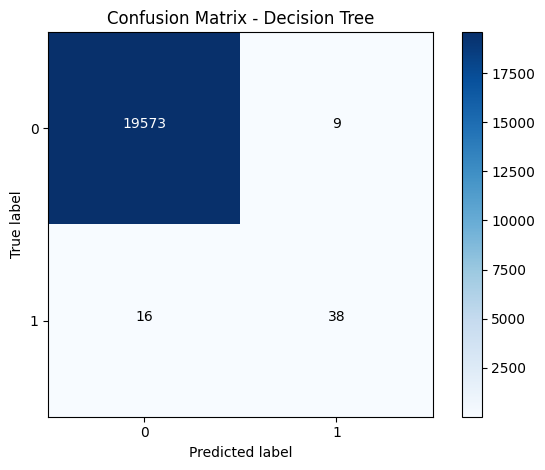

In [26]:
plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree")


In [27]:
# plotting confusion matrix for RANDOM FOREST
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[19581     1]
 [   11    43]]


Confusion matrix, without normalization


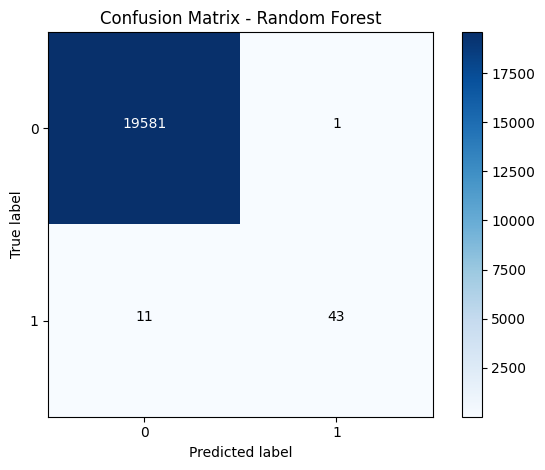

In [28]:
plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

In [29]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))


In [30]:
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())


Evaluation of Decision Tree Model

Accuracy: 0.99873
Precision: 0.80851
Recall: 0.70370
F1-score: 0.75248


In [31]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99939
Precision: 0.97727
Recall: 0.79630
F1-score: 0.87755


In [33]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# ✅ 1. Drop rows where Y is missing
data = pd.concat([X, Y], axis=1)
data = data.dropna(subset=[Y.name])  # Drop rows with NaN labels

# ✅ 2. Separate features & labels
X_clean = data.drop(columns=[Y.name])
Y_clean = data[Y.name]

# ✅ 3. Fill missing values in X (numeric only)
X_clean = X_clean.fillna(X_clean.median())

# ✅ 4. Apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_clean, Y_clean)

print("✅ After SMOTE:")
print("X shape:", X_resampled.shape)
print("Y shape:", Y_resampled.shape)
print("Class distribution:", Counter(Y_resampled))

# ✅ 5. Train/test split
train_X, test_X, train_Y, test_Y = train_test_split(
    X_resampled, Y_resampled, test_size=0.3, random_state=42
)


✅ After SMOTE:
X shape: (130566, 29)
Y shape: (130566,)
Class distribution: Counter({0.0: 65283, 1.0: 65283})


In [34]:
# Building the Random Forest classifier on a new dataset

rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [35]:
# Visualizing the confusion matrix

cm_resampled = confusion_matrix(test_Y, predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)

Confusion Matrix - Random Forest
[[19668     6]
 [    0 19496]]


Confusion matrix, without normalization


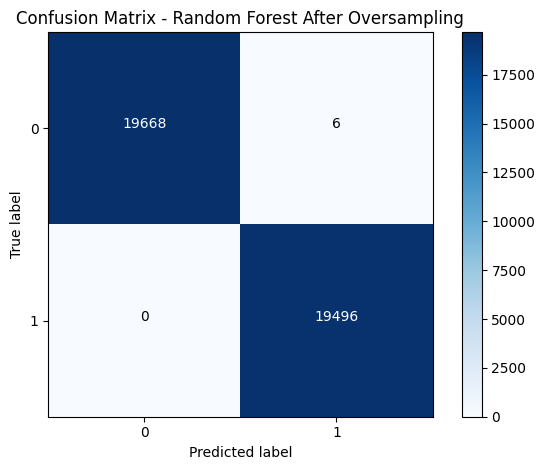

In [36]:
plot_confusion_matrix(cm_resampled, classes=[0, 1], title= "Confusion Matrix - Random Forest After Oversampling")


In [37]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.99985
Precision: 0.99969
Recall: 1.00000
F1-score: 0.99985
